In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.impute import SimpleImputer

import itertools
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.covariance import EllipticEnvelope

In [4]:
bank = pd.read_csv('application_data1.csv')
bank

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OWN_CAR_AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,26.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,-9327,-236,-8456.0,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,-20775,365243,-4388.0,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,-14966,-7921,-6737.0,NaN
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-11961,-4786,-2562.0,NaN


## Description 

## Explatory Data Analysis 

In [5]:
bank[bank.duplicated(['SK_ID_CURR'])] 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OWN_CAR_AGE


In [6]:
for col in bank.columns: 
    print(f"for column {col}\n-----------\n")
    print(bank[col].value_counts())
    print("\n")

for column SK_ID_CURR
-----------

100303    1
131861    1
158488    1
156441    1
160539    1
         ..
255446    1
257495    1
234968    1
237017    1
100401    1
Name: SK_ID_CURR, Length: 307511, dtype: int64


for column TARGET
-----------

0    282686
1     24825
Name: TARGET, dtype: int64


for column NAME_CONTRACT_TYPE
-----------

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


for column CODE_GENDER
-----------

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


for column FLAG_OWN_CAR
-----------

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


for column FLAG_OWN_REALTY
-----------

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


for column CNT_CHILDREN
-----------

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dt

In [7]:
round(bank.isnull().sum() / bank.shape[0] * 100.00,2)

SK_ID_CURR              0.00
TARGET                  0.00
NAME_CONTRACT_TYPE      0.00
CODE_GENDER             0.00
FLAG_OWN_CAR            0.00
FLAG_OWN_REALTY         0.00
CNT_CHILDREN            0.00
AMT_INCOME_TOTAL        0.00
AMT_CREDIT              0.00
AMT_ANNUITY             0.00
AMT_GOODS_PRICE         0.09
NAME_TYPE_SUITE         0.42
NAME_INCOME_TYPE        0.00
NAME_EDUCATION_TYPE     0.00
NAME_FAMILY_STATUS      0.00
NAME_HOUSING_TYPE       0.00
DAYS_BIRTH              0.00
DAYS_EMPLOYED           0.00
DAYS_REGISTRATION       0.00
OWN_CAR_AGE            65.99
dtype: float64

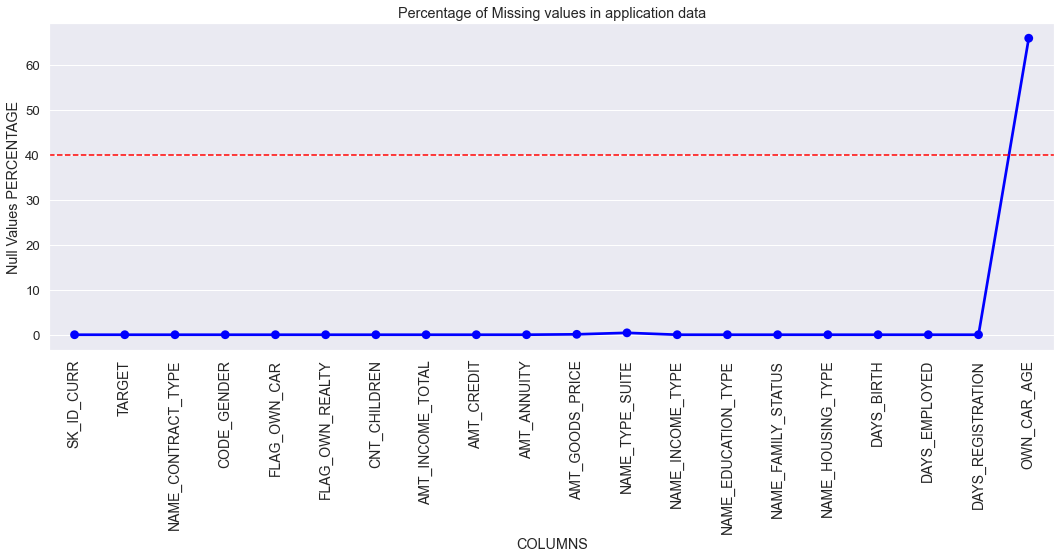

In [8]:
null_bank = pd.DataFrame((bank.isnull().sum())*100/bank.shape[0]).reset_index()
null_bank.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_bank,color='blue')
plt.xticks(rotation =90,fontsize =14)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()
## it seems from the following graph that there are missing values which are within columns whether the clients car
## age and their occupation type

## Data PreProcessing 

In [9]:
bank["CODE_GENDER"] = np.where(bank["CODE_GENDER"]=="XNA",bank["CODE_GENDER"].mode(),bank["CODE_GENDER"])

In [10]:
date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION']
for x in date_col:
    bank[x] = abs(bank[x])

In [11]:
imputer_mode = SimpleImputer(strategy='most_frequent')

In [12]:
bank['OWN_CAR_AGE'] = imputer_mode.fit_transform(bank[['OWN_CAR_AGE']])

In [13]:
bank['NAME_TYPE_SUITE'] = imputer_mode.fit_transform(bank[['NAME_TYPE_SUITE']])

In [14]:
imputer_median = SimpleImputer(strategy='median')

In [15]:
bank['AMT_ANNUITY'] = imputer_median.fit_transform(bank[['AMT_ANNUITY']])

In [16]:
bank['AMT_GOODS_PRICE'] = imputer_median.fit_transform(bank[['AMT_GOODS_PRICE']])

In [17]:
bank.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
DAYS_REGISTRATION      0
OWN_CAR_AGE            0
dtype: int64

## Feature Transformation and Enginnering 

In [18]:
bank['AGE'] = bank['DAYS_BIRTH'] // 365
## Since the clients age are not explicitly given, the age is calculated here 

In [19]:
bank['AMT_INCOME_TOTAL1']=bank['AMT_INCOME_TOTAL']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

bank['AMT_INCOME_RANGE']=pd.cut(bank['AMT_INCOME_TOTAL1'],bins,labels=slot)
##  Turnning the TOTAL income into bins are good measure to visualize our data which is know as fine classing 

In [20]:
bank['AMT_CREDIT1']=bank['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

bank['AMT_CREDIT_RANGE']=pd.cut(bank['AMT_CREDIT1'],bins=bins,labels=slots)



In [21]:
bank['AMT_INCOME_RANGE'].value_counts(normalize=True)*100
## It can be interporlated that the majority of the clients (50%) recieve an income between 100 to 200 K 

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

In [22]:
bank['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100
## It can be interporlated that the majority of the clients require amount of 200 to 300 K 

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

In [23]:
bank['AMT_ANNUITY1']=bank['AMT_ANNUITY']/100000

bins = [0,1,2,3]
slots = ['0-100K','100K-200K', '200k-300k']

bank['AMT_ANNUITY_RANGE']=pd.cut(bank['AMT_ANNUITY1'],bins=bins,labels=slots)

In [24]:
bank['AMT_ANNUITY_RANGE'].value_counts(normalize=True)*100

0-100K       99.835778
100K-200K     0.152515
200k-300k     0.011707
Name: AMT_ANNUITY_RANGE, dtype: float64

In [25]:
bank['AMT_GOODS_PRICE1']=bank['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

bank['AMT_GOODPRICR_RANGE']=pd.cut(bank['AMT_GOODS_PRICE1'],bins=bins,labels=slots)

In [26]:
bank['AMT_GOODS_PRICE'].value_counts(normalize=True)*100

450000.0    8.552540
225000.0    8.221495
675000.0    8.117433
900000.0    5.013154
270000.0    3.716290
              ...   
705892.5    0.000325
442062.0    0.000325
353641.5    0.000325
353749.5    0.000325
738945.0    0.000325
Name: AMT_GOODS_PRICE, Length: 1002, dtype: float64

In [27]:
bank['AMT_INCOME_RANGE'] = imputer_mode.fit_transform(bank[['AMT_INCOME_RANGE']])

In [28]:
bank.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
DAYS_REGISTRATION      0
OWN_CAR_AGE            0
AGE                    0
AMT_INCOME_TOTAL1      0
AMT_INCOME_RANGE       0
AMT_CREDIT1            0
AMT_CREDIT_RANGE       0
AMT_ANNUITY1           0
AMT_ANNUITY_RANGE      0
AMT_GOODS_PRICE1       0
AMT_GOODPRICR_RANGE    0
dtype: int64

## Data Visualizations 

In [29]:
target0 = bank.loc[bank["TARGET"]==0]
target1 = bank.loc[bank["TARGET"]==1]

In [30]:
def plotfunc(bank,col,title,hue =None):
    
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(bank[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = bank, x= col, order=bank[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()
    

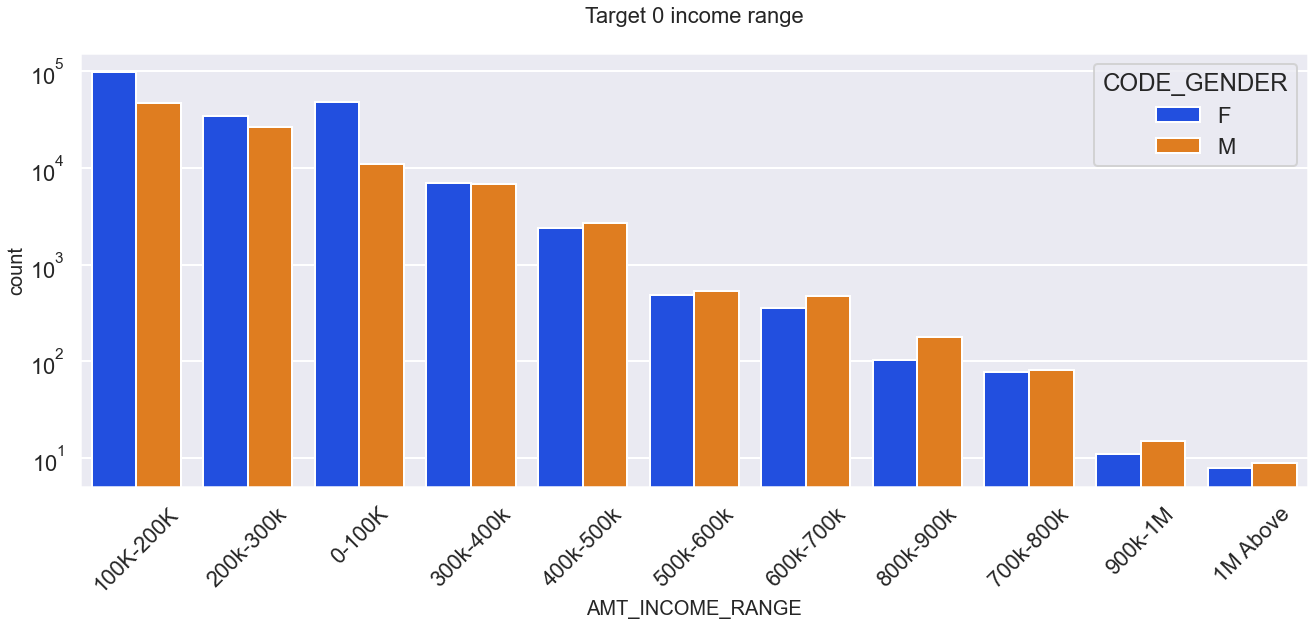

In [31]:
plotfunc(target0,col='AMT_INCOME_RANGE',title='Target 0 income range',hue='CODE_GENDER')

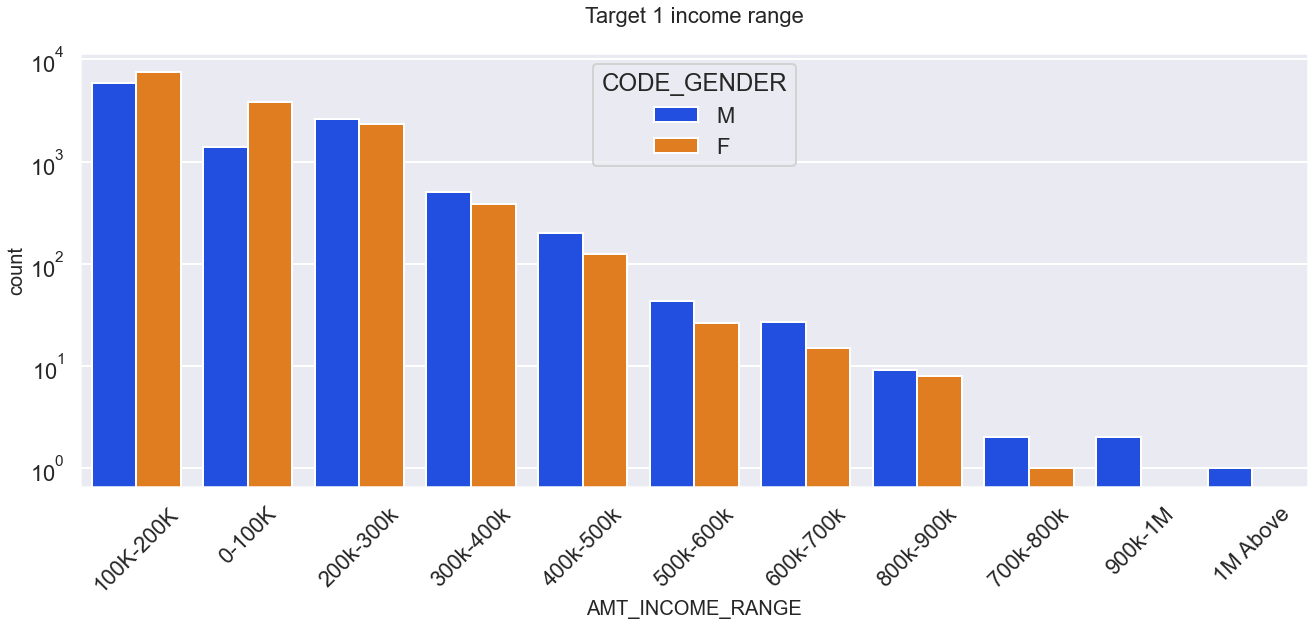

In [32]:
plotfunc(target1,col='AMT_INCOME_RANGE',title='Target 1 income range',hue='CODE_GENDER')

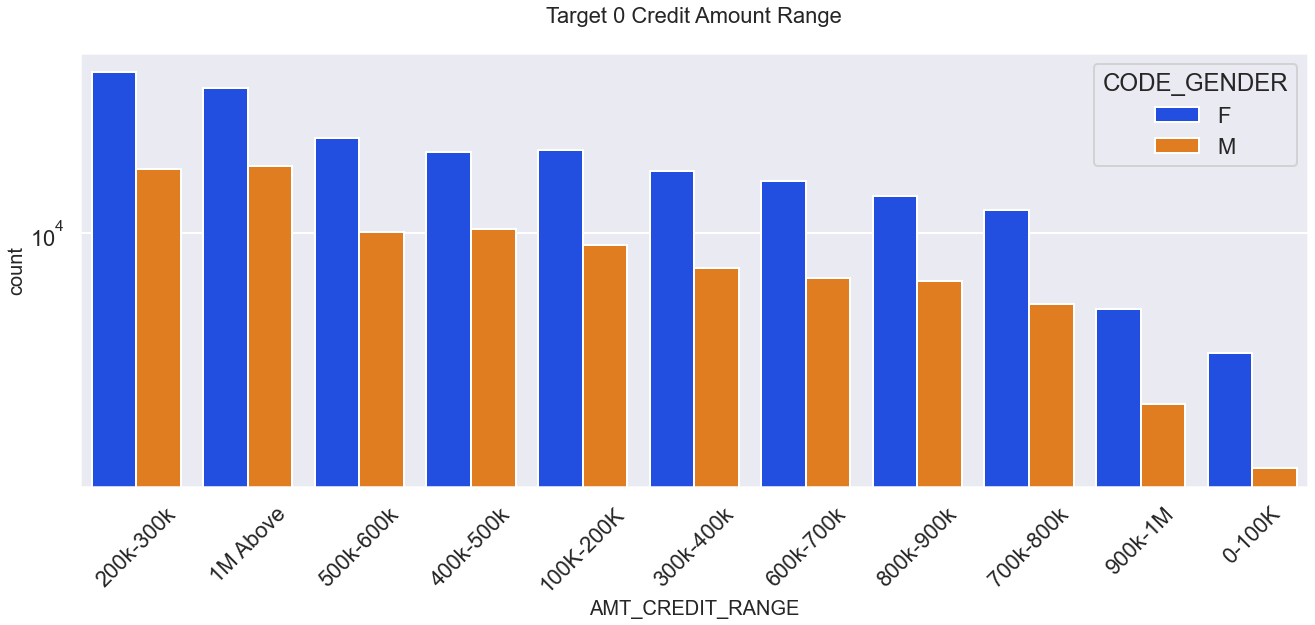

In [33]:
plotfunc(target0,col='AMT_CREDIT_RANGE',title='Target 0 Credit Amount Range',hue='CODE_GENDER')

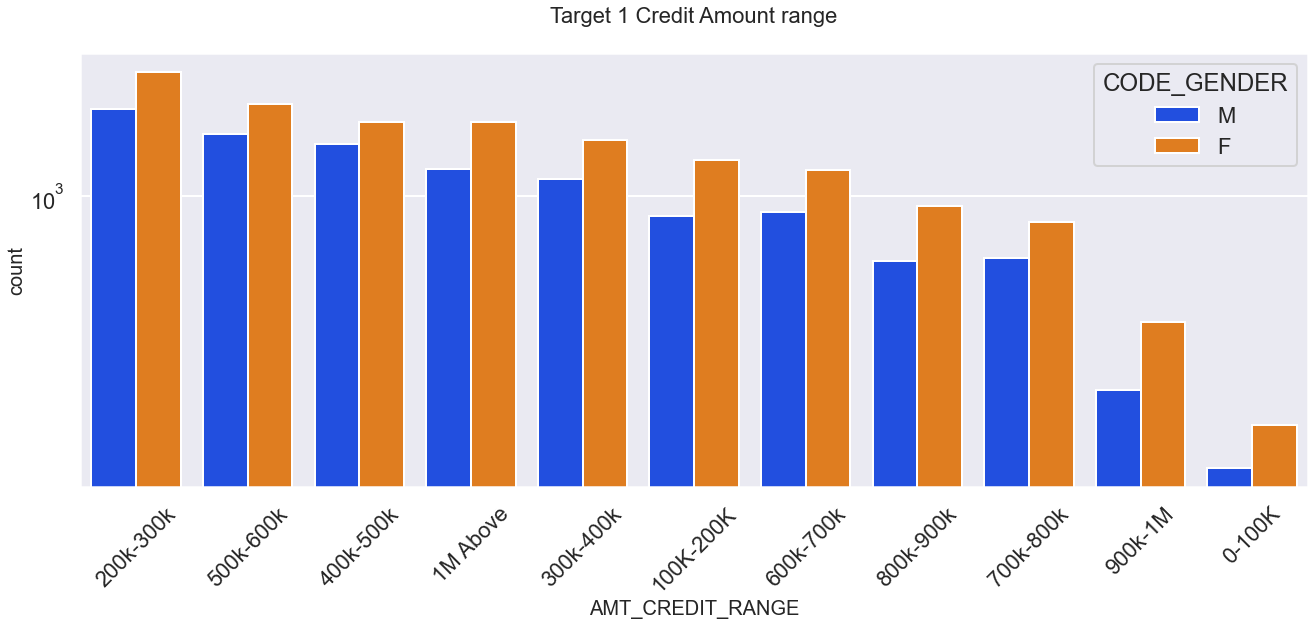

In [34]:
plotfunc(target1,col='AMT_CREDIT_RANGE',title='Target 1 Credit Amount range',hue='CODE_GENDER')

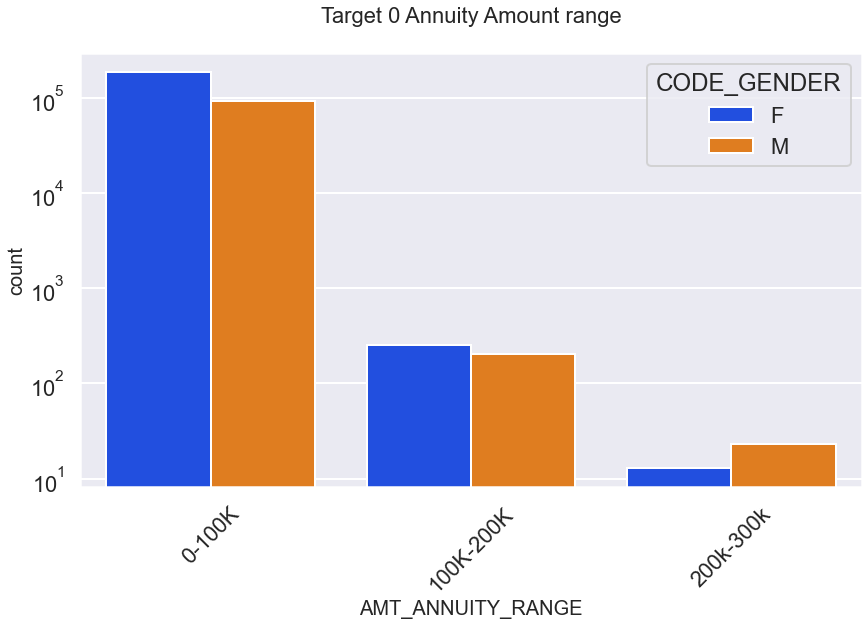

In [35]:
plotfunc(target0,col='AMT_ANNUITY_RANGE',title='Target 0 Annuity Amount range',hue='CODE_GENDER')

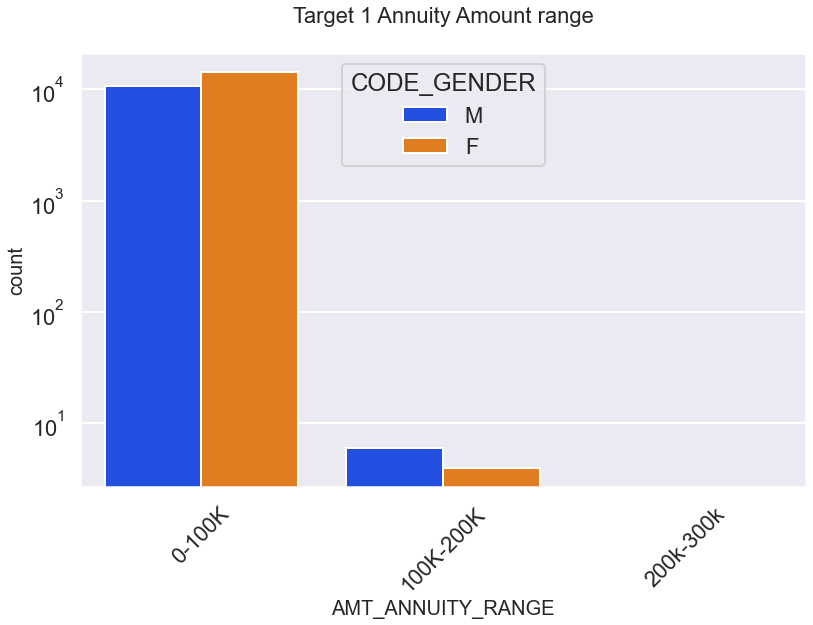

In [36]:
plotfunc(target1,col='AMT_ANNUITY_RANGE',title='Target 1 Annuity Amount range',hue='CODE_GENDER')

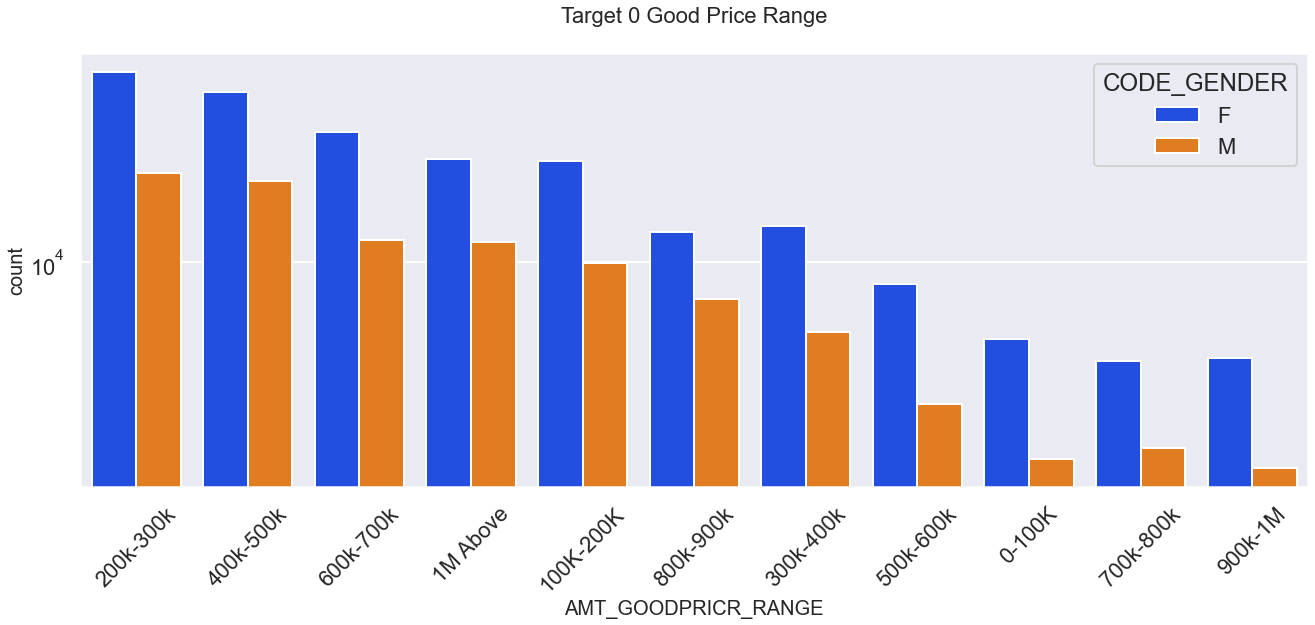

In [37]:
plotfunc(target0,col='AMT_GOODPRICR_RANGE',title='Target 0 Good Price Range',hue='CODE_GENDER')

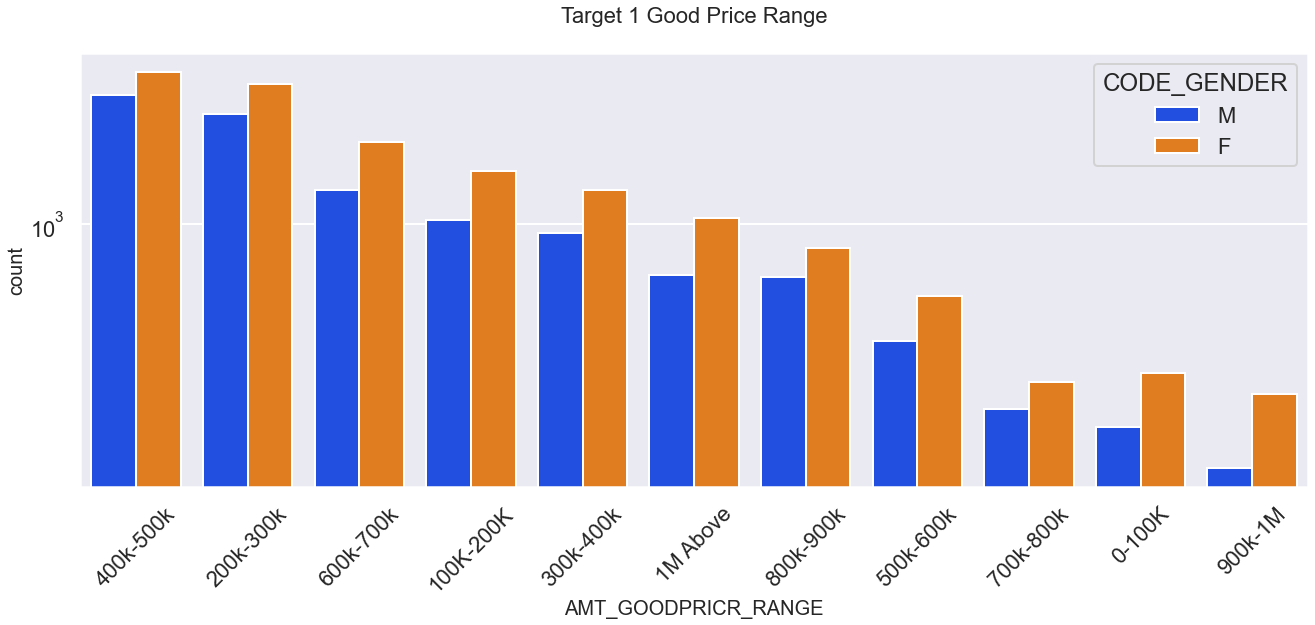

In [38]:
plotfunc(target1,col='AMT_GOODPRICR_RANGE',title='Target 1 Good Price Range',hue='CODE_GENDER')

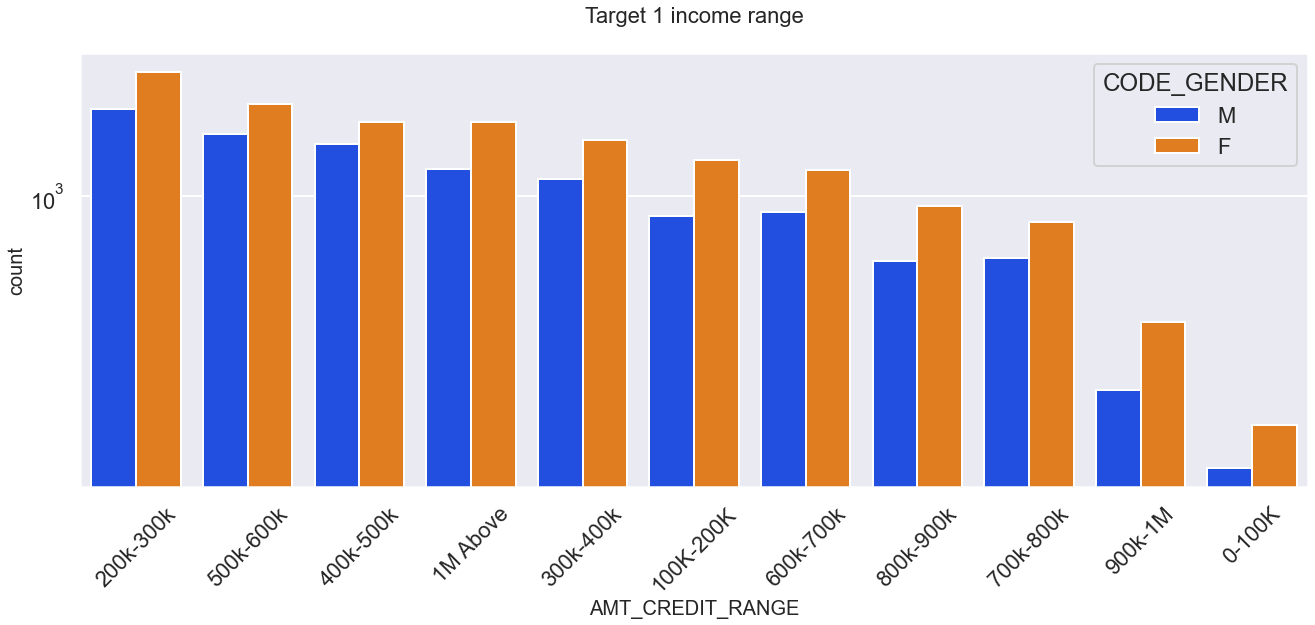

In [39]:
plotfunc(target1,col='AMT_CREDIT_RANGE',title='Target 1 income range',hue='CODE_GENDER')

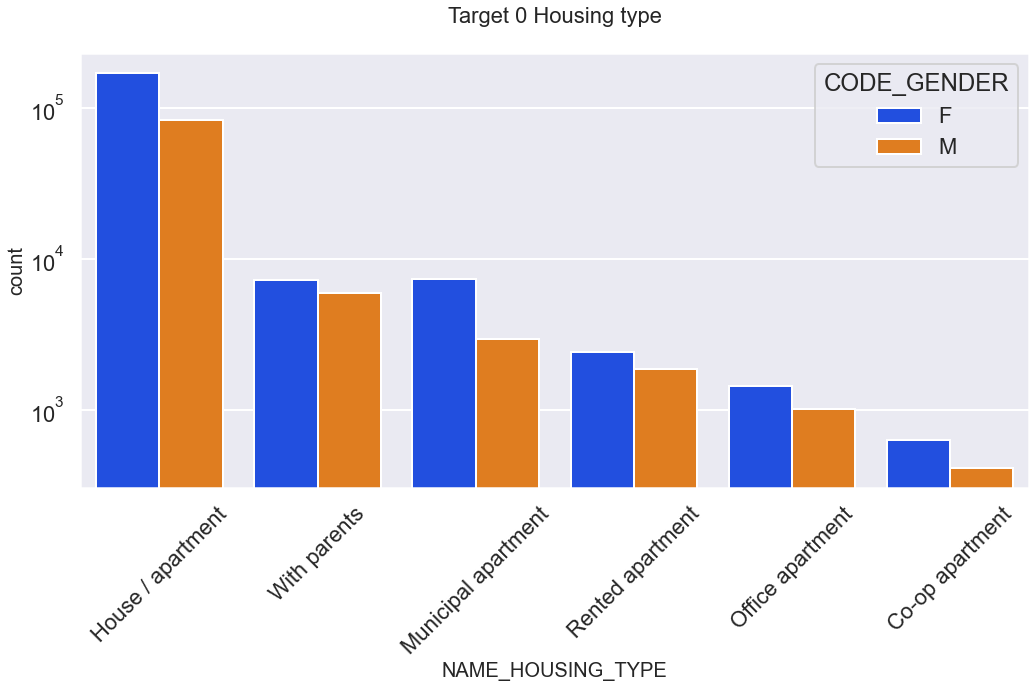

In [40]:
plotfunc(target0,col='NAME_HOUSING_TYPE',title='Target 0 Housing type',hue='CODE_GENDER')

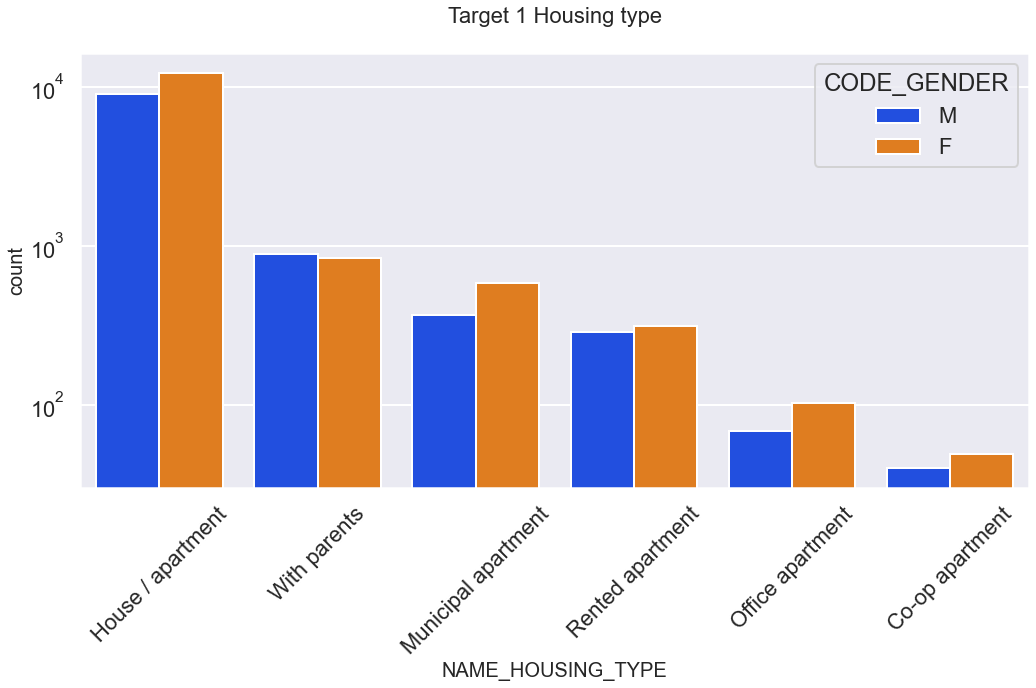

In [41]:
plotfunc(target1,col='NAME_HOUSING_TYPE',title='Target 1 Housing type',hue='CODE_GENDER')

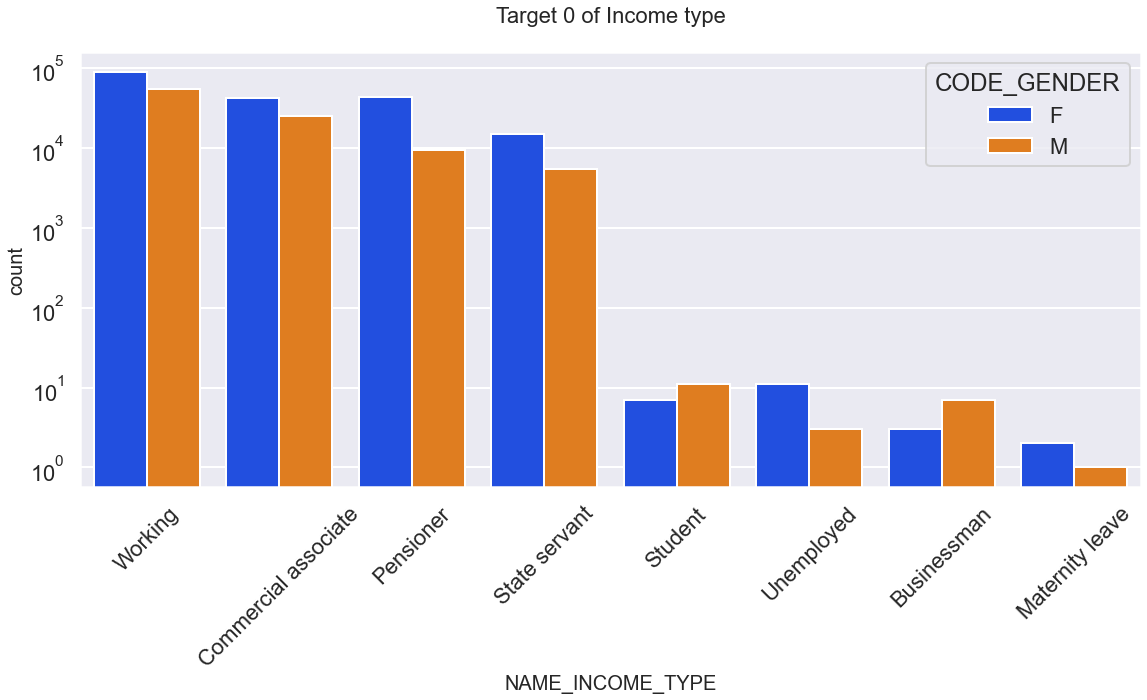

In [42]:
plotfunc(target0,col='NAME_INCOME_TYPE',title='Target 0 of Income type',hue='CODE_GENDER')

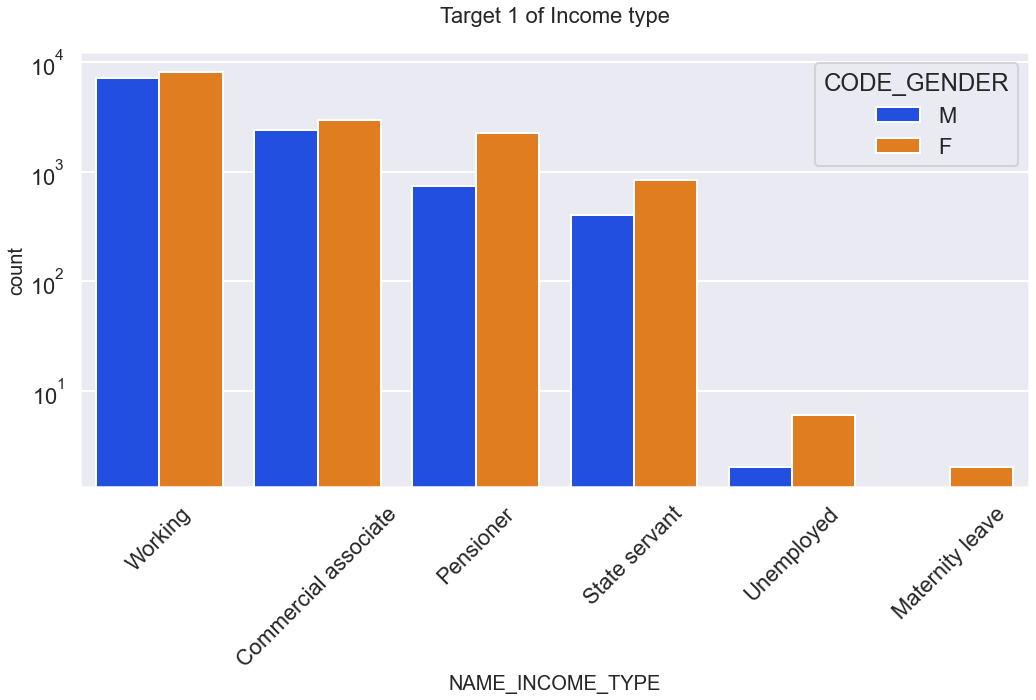

In [43]:
plotfunc(target1,col='NAME_INCOME_TYPE',title='Target 1 of Income type',hue='CODE_GENDER')

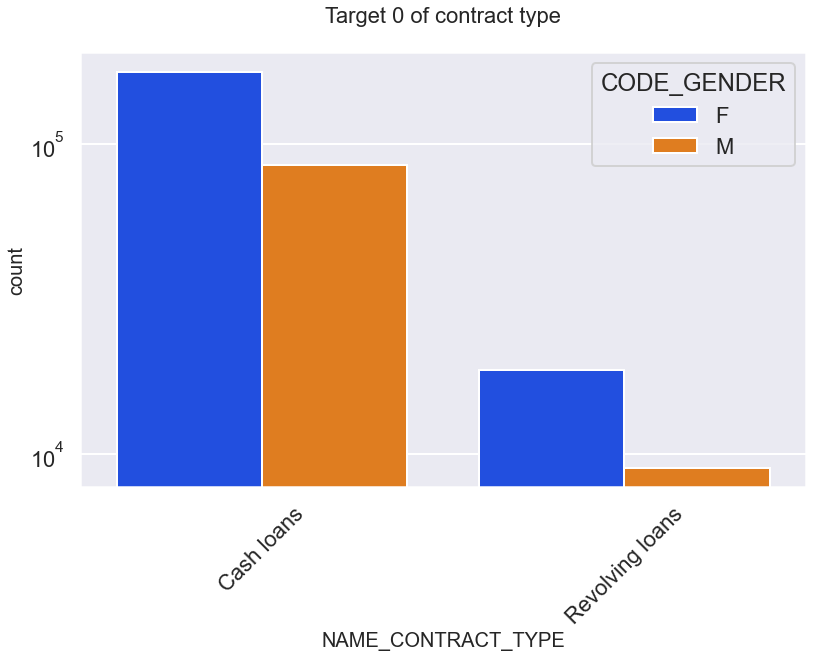

In [44]:
plotfunc(target0,col='NAME_CONTRACT_TYPE',title='Target 0 of contract type',hue='CODE_GENDER')

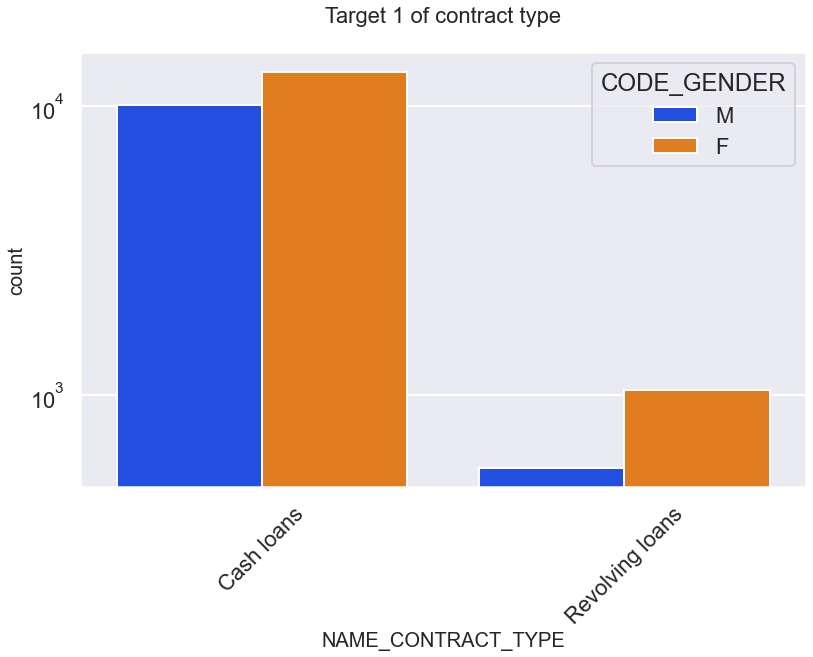

In [45]:
plotfunc(target1,col='NAME_CONTRACT_TYPE',title='Target 1 of contract type',hue='CODE_GENDER')

In [46]:
for col in bank.columns: 
    print(f"for column {col}\n-----------\n")
    print(bank[col].value_counts())
    print("\n")

for column SK_ID_CURR
-----------

100303    1
131861    1
158488    1
156441    1
160539    1
         ..
255446    1
257495    1
234968    1
237017    1
100401    1
Name: SK_ID_CURR, Length: 307511, dtype: int64


for column TARGET
-----------

0    282686
1     24825
Name: TARGET, dtype: int64


for column NAME_CONTRACT_TYPE
-----------

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


for column CODE_GENDER
-----------

F    202452
M    105059
Name: CODE_GENDER, dtype: int64


for column FLAG_OWN_CAR
-----------

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


for column FLAG_OWN_REALTY
-----------

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


for column CNT_CHILDREN
-----------

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64


for c

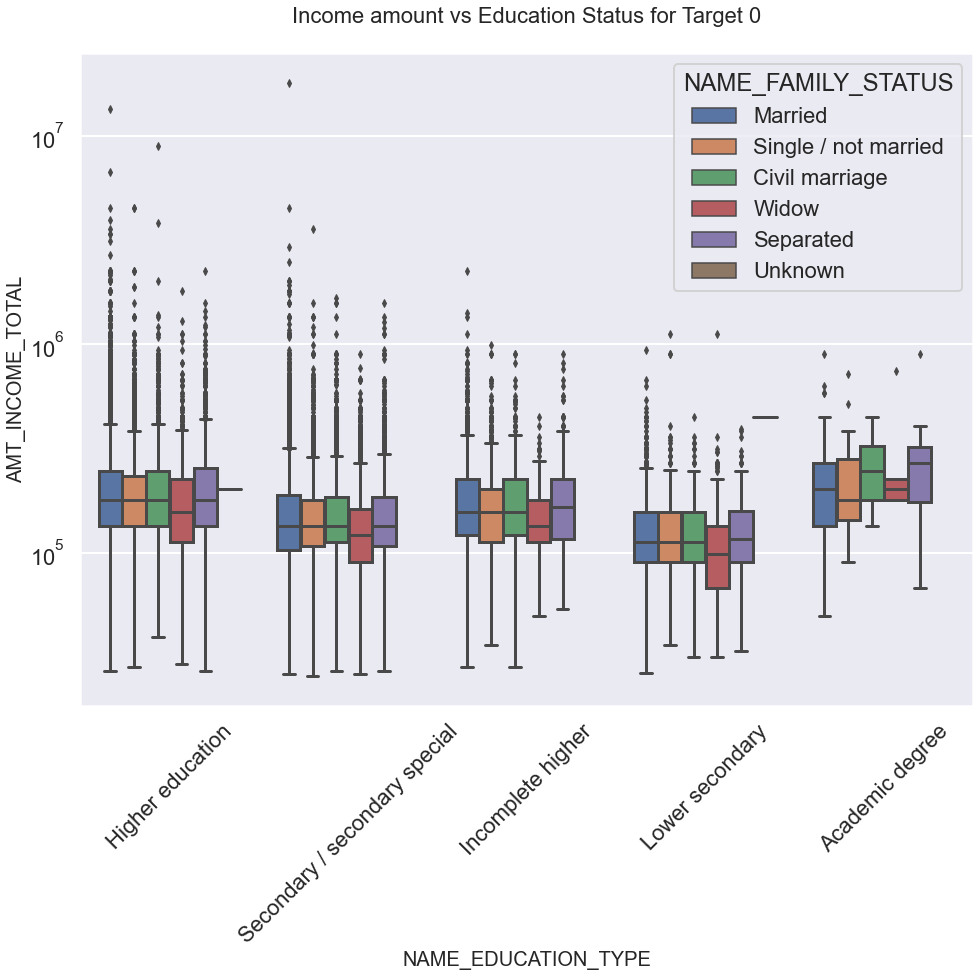

In [47]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for Target 0')
plt.show()

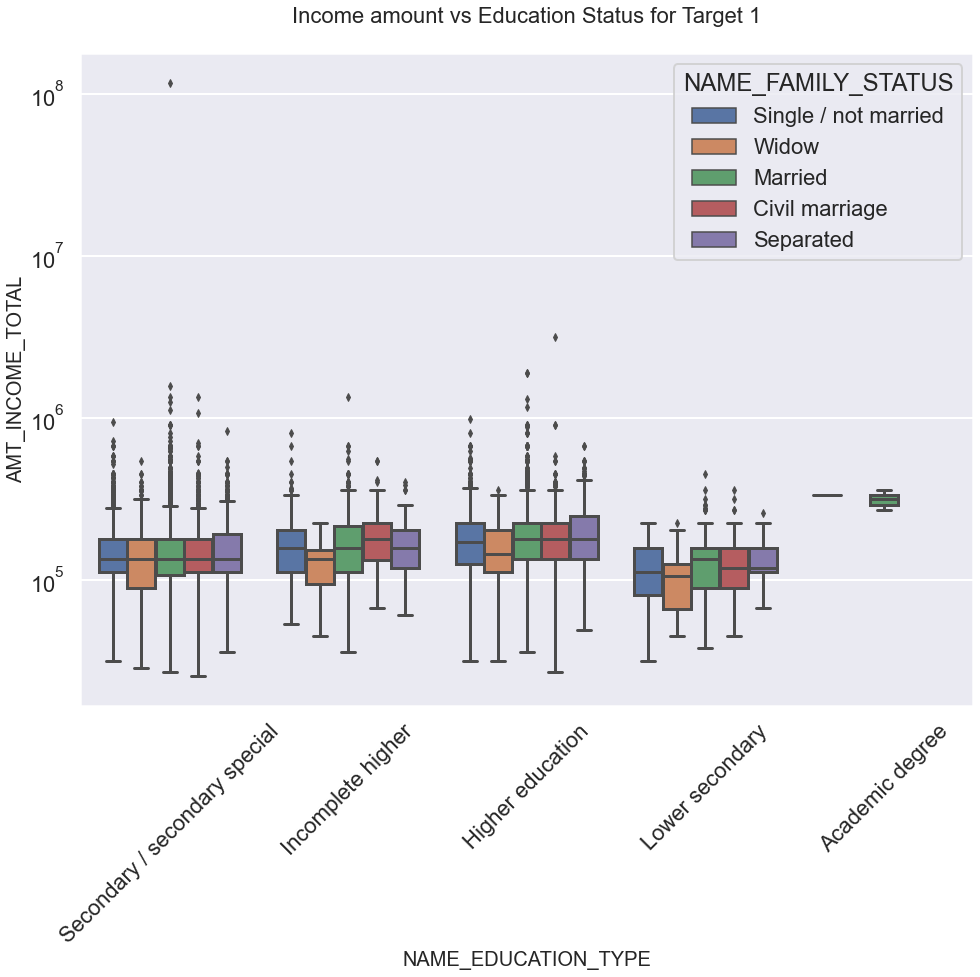

In [48]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for Target 1')
plt.show()

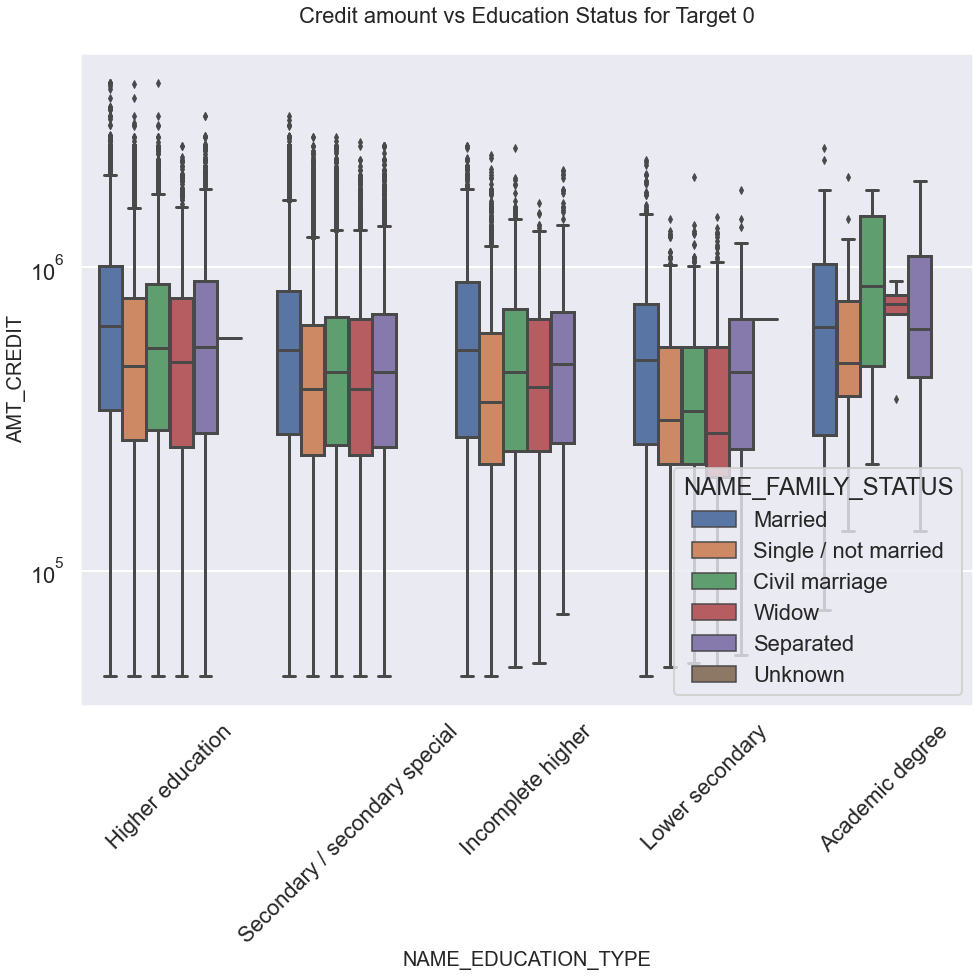

In [49]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status for Target 0')
plt.show()

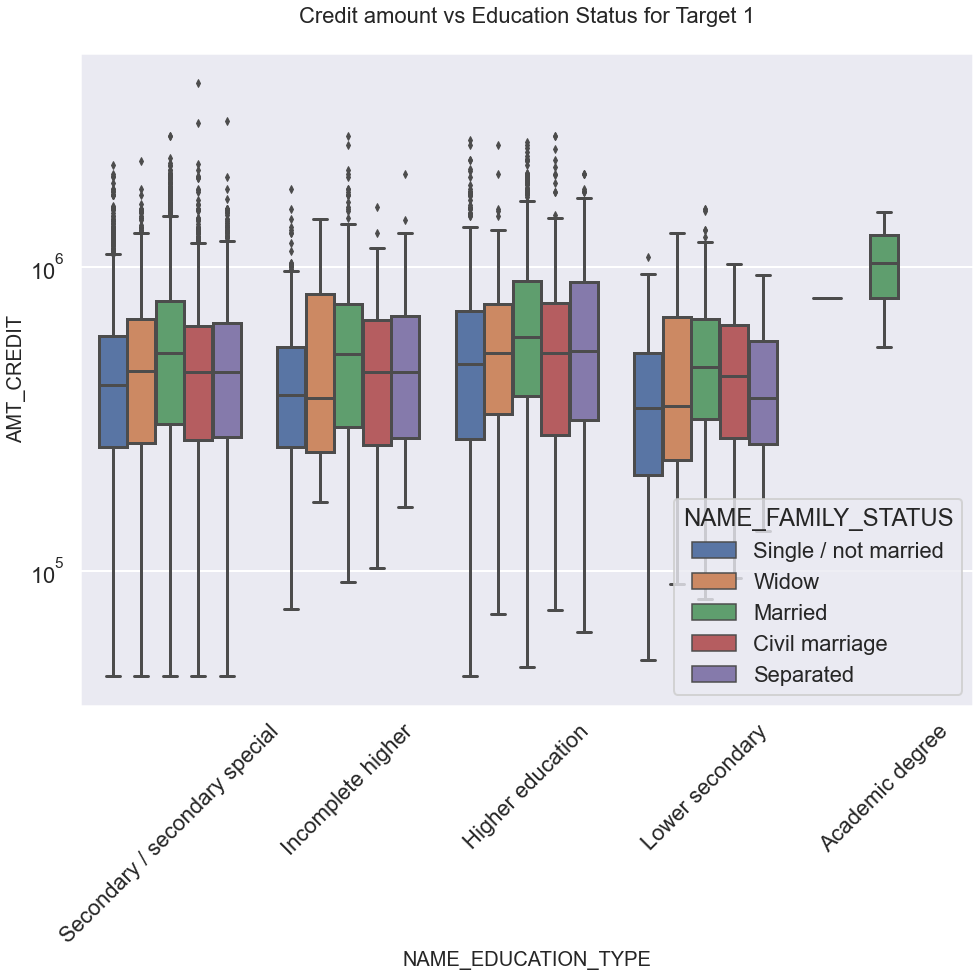

In [50]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status for Target 1')
plt.show()

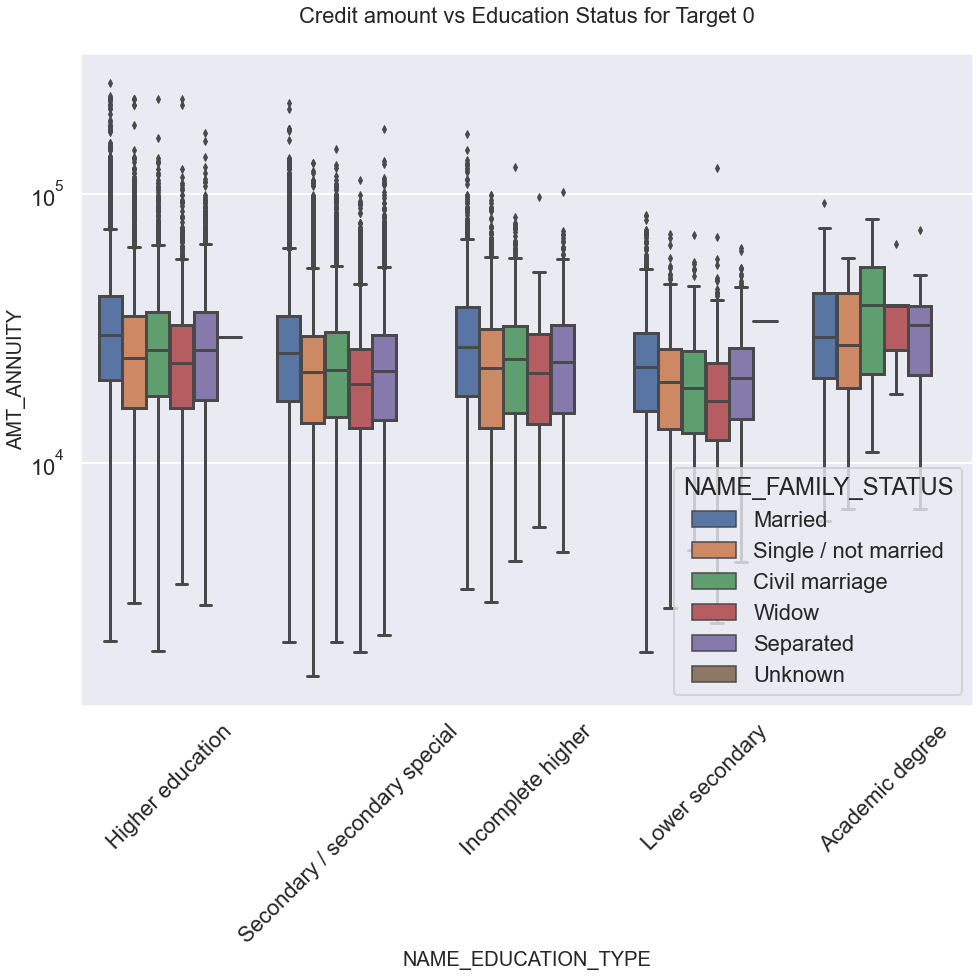

In [51]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_ANNUITY', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status for Target 0')
plt.show()

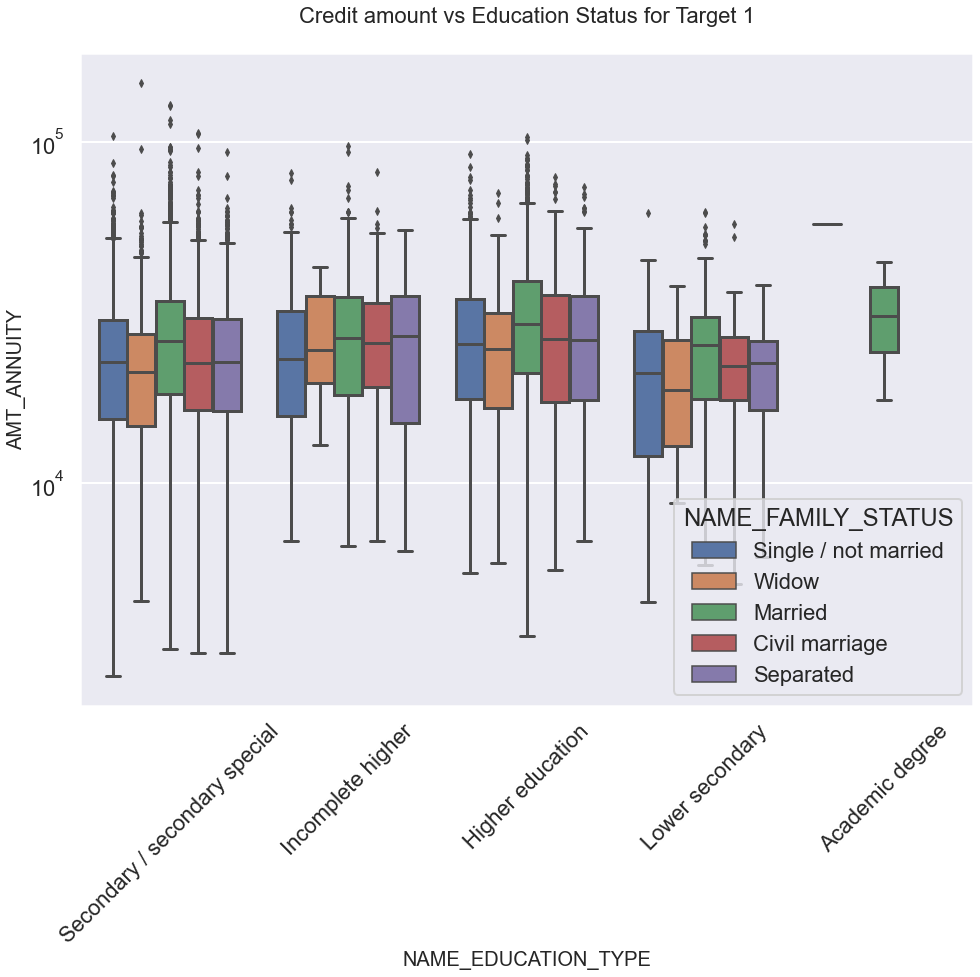

In [52]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_ANNUITY', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status for Target 1')
plt.show()

In [53]:
bank.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'OWN_CAR_AGE', 'AGE', 'AMT_INCOME_TOTAL1', 'AMT_INCOME_RANGE',
       'AMT_CREDIT1', 'AMT_CREDIT_RANGE', 'AMT_ANNUITY1', 'AMT_ANNUITY_RANGE',
       'AMT_GOODS_PRICE1', 'AMT_GOODPRICR_RANGE'],
      dtype='object')

In [54]:
bank.drop(["SK_ID_CURR","AMT_INCOME_TOTAL1","AMT_INCOME_RANGE","AMT_CREDIT1","AMT_CREDIT_RANGE",
                  "AMT_ANNUITY1","AMT_ANNUITY_RANGE","AMT_GOODS_PRICE1","AMT_GOODPRICR_RANGE","DAYS_BIRTH"],axis = 1, inplace = True)

In [55]:
gender_le = LabelEncoder()


In [56]:
owncar_le = LabelEncoder()

In [57]:
contract_le = LabelEncoder()

In [58]:
ownreality_le = LabelEncoder()

In [59]:
bank["CODE_GENDER"]= gender_le.fit_transform(bank["CODE_GENDER"])

In [60]:
bank["FLAG_OWN_CAR"]= owncar_le.fit_transform(bank["FLAG_OWN_CAR"])

In [61]:
bank["FLAG_OWN_REALTY"] = ownreality_le.fit_transform(bank["FLAG_OWN_REALTY"])

In [62]:
bank["NAME_CONTRACT_TYPE"] = contract_le.fit_transform(bank["NAME_CONTRACT_TYPE"])

In [63]:
nametype_le = LabelEncoder()

In [64]:
incometype_le = LabelEncoder()

In [65]:
education_le =  LabelEncoder()

In [66]:
familty_le = LabelEncoder()

In [67]:
Occupation_le = LabelEncoder()

In [68]:
housing_le = LabelEncoder()

In [69]:
bank["NAME_TYPE_SUITE"]= nametype_le.fit_transform(bank["NAME_TYPE_SUITE"])

In [70]:
bank["NAME_INCOME_TYPE"]= incometype_le.fit_transform(bank["NAME_INCOME_TYPE"])

In [71]:
bank["NAME_EDUCATION_TYPE"]= education_le.fit_transform(bank["NAME_EDUCATION_TYPE"])

In [72]:
bank["NAME_FAMILY_STATUS"]= familty_le.fit_transform(bank["NAME_FAMILY_STATUS"])

In [73]:
bank["NAME_HOUSING_TYPE"]= Occupation_le.fit_transform(bank["NAME_HOUSING_TYPE"])

In [74]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               307511 non-null  int64  
 1   NAME_CONTRACT_TYPE   307511 non-null  int64  
 2   CODE_GENDER          307511 non-null  int64  
 3   FLAG_OWN_CAR         307511 non-null  int64  
 4   FLAG_OWN_REALTY      307511 non-null  int64  
 5   CNT_CHILDREN         307511 non-null  int64  
 6   AMT_INCOME_TOTAL     307511 non-null  float64
 7   AMT_CREDIT           307511 non-null  float64
 8   AMT_ANNUITY          307511 non-null  float64
 9   AMT_GOODS_PRICE      307511 non-null  float64
 10  NAME_TYPE_SUITE      307511 non-null  int64  
 11  NAME_INCOME_TYPE     307511 non-null  int64  
 12  NAME_EDUCATION_TYPE  307511 non-null  int64  
 13  NAME_FAMILY_STATUS   307511 non-null  int64  
 14  NAME_HOUSING_TYPE    307511 non-null  int64  
 15  DAYS_EMPLOYED    

In [75]:
bank.describe()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_REGISTRATION,OWN_CAR_AGE,AGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.095213,0.341643,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,5.222990,4.670288,3.188273,1.472312,1.290390,67724.742149,4986.120328,8.721236,43.435968
std,0.272419,0.293509,0.474261,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,1.772626,2.544525,1.298753,1.168884,0.951168,139443.751806,3522.886321,7.366967,11.954593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,6.000000,3.000000,2.000000,1.000000,1.000000,933.000000,2010.000000,7.000000,34.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,6.000000,7.000000,4.000000,1.000000,1.000000,2219.000000,4504.000000,7.000000,43.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,6.000000,7.000000,4.000000,2.000000,1.000000,5707.000000,7479.500000,7.000000,53.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,6.000000,7.000000,4.000000,5.000000,5.000000,365243.000000,24672.000000,91.000000,69.000000


## Identfying Outliers and dealing with Outliers 

In [76]:
age_median = float(bank['AGE'].median())
bank["AGE"] = np.where(bank["AGE"] > age_median, age_median, bank['AGE'])

In [77]:
income_median = float(bank['AMT_INCOME_TOTAL'].median())
bank["AMT_INCOME_TOTAL"] = np.where(bank["AMT_INCOME_TOTAL"] > income_median, income_median, bank['AMT_INCOME_TOTAL'])


In [78]:
credit_median = float(bank['AMT_CREDIT'].median())
bank["AMT_CREDIT"] = np.where(bank["AMT_CREDIT"] > credit_median, credit_median, bank['AMT_CREDIT'])

In [79]:
annuity_median = float(bank['AMT_ANNUITY'].median())
bank["AMT_ANNUITY"] = np.where(bank["AMT_ANNUITY"] > annuity_median, annuity_median, bank['AMT_ANNUITY'])

In [80]:
price_median = float(bank['AMT_GOODS_PRICE'].median())
bank["AMT_GOODS_PRICE"] = np.where(bank["AMT_GOODS_PRICE"] > price_median, price_median, bank['AMT_GOODS_PRICE'])

In [81]:
employed_median = float(bank['DAYS_EMPLOYED'].median())
bank["DAYS_EMPLOYED"] = np.where(bank["DAYS_EMPLOYED"] > employed_median, employed_median, bank['DAYS_EMPLOYED'])

In [82]:
regist_median = float(bank['DAYS_REGISTRATION'].median())
bank["DAYS_REGISTRATION"] = np.where(bank["DAYS_REGISTRATION"] > regist_median, regist_median, bank['DAYS_REGISTRATION'])

In [83]:
car_median = float(bank['OWN_CAR_AGE'].median())
bank["OWN_CAR_AGE"] = np.where(bank["OWN_CAR_AGE"] > car_median, car_median, bank['OWN_CAR_AGE'])

## Scaling the data 

In [84]:
x = bank.drop("TARGET", axis=1)
y = bank["TARGET"]

In [85]:
for col in x.columns: 
    print(f"for column {col}\n-----------\n")
    print(x[col].value_counts())
    print("\n")

for column NAME_CONTRACT_TYPE
-----------

0    278232
1     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


for column CODE_GENDER
-----------

0    202452
1    105059
Name: CODE_GENDER, dtype: int64


for column FLAG_OWN_CAR
-----------

0    202924
1    104587
Name: FLAG_OWN_CAR, dtype: int64


for column FLAG_OWN_REALTY
-----------

1    213312
0     94199
Name: FLAG_OWN_REALTY, dtype: int64


for column CNT_CHILDREN
-----------

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64


for column AMT_INCOME_TOTAL
-----------

147150.0    153758
135000.0     35750
112500.0     31019
90000.0      22483
67500.0      11147
             ...  
103387.5         1
51691.5          1
51642.0          1
103230.0         1
131098.5         1
Name: AMT_INCOME_TOTAL, Length: 1314, dtype: int64


for column AMT_CREDIT
--------

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
sc = StandardScaler()
X = sc.fit_transform(x)

In [88]:
X.shape

(307511, 18)

## Feature Scailing 

In [89]:
all_features = x.columns
all_features

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'AGE'],
      dtype='object')

In [90]:
selector = SelectKBest(k=14, score_func=f_classif)

In [91]:
selector.fit(x,y)

SelectKBest(k=14)

In [92]:
selector.scores_

array([2.93815375e+02, 9.23285127e+02, 1.46894464e+02, 1.16251011e+01,
       1.13249930e+02, 1.40901501e+01, 1.41824259e+01, 8.39678092e+01,
       8.20782391e-02, 2.12804362e+01, 6.75848098e+02, 9.22808544e+02,
       5.23819680e+00, 3.66206391e+02, 2.08353071e+03, 2.71900443e+02,
       2.06853956e+02, 1.61567959e+03])

In [93]:
selected_features_idx = selector.get_support(indices=True)
selected_features_idx

array([ 0,  1,  2,  4,  6,  7,  9, 10, 11, 13, 14, 15, 16, 17])

In [94]:
selected_features = all_features[selected_features_idx]
selected_features

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'CNT_CHILDREN',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'AGE'],
      dtype='object')

In [95]:
X = x[selected_features]


In [96]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

## Applying SMOTE 

In [97]:
sm = SMOTE(random_state=27)
x_train, y_train = sm.fit_sample(x_train, y_train)

In [98]:
x_train.shape

(452224, 14)

In [99]:
y_train.shape

(452224,)

In [100]:
x_test.shape

(61503, 14)

In [101]:
y_test.shape

(61503,)

## Fitting the Model

In [102]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(x_train , y_train)
accuracies = cross_val_score(estimator = model_logistic, X = x_train, y = y_train, cv = 5,verbose = 1)
y_pred = model_logistic.predict(x_test)
print('')
print('####### Logistic Regression #######')
print('Score : %.4f' % model_logistic.score(x_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5


print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"\n-----------------------------------------\n")
accuracy_score(y_test, y_pred)
print("The Accuracy Score is", accuracy_score(y_test,y_pred))
print(f"\n-----------------------------------------\n")
print("This is the classificarion report","\n",classification_report(y_test,y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



####### Logistic Regression #######
Score : 0.6368
[0.56731715 0.56833435 0.56913041 0.56648792 0.57029764]

MSE    : 0.36 
MAE    : 0.36 
RMSE   : 0.60 
[[36681 19893]
 [ 2446  2483]]

-----------------------------------------

The Accuracy Score is 0.6367819455961498

-----------------------------------------

This is the classificarion report 
               precision    recall  f1-score   support

           0       0.94      0.65      0.77     56574
           1       0.11      0.50      0.18      4929

    accuracy                           0.64     61503
   macro avg       0.52      0.58      0.47     61503
weighted avg       0.87      0.64      0.72     61503



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.2s finished


In [103]:
model_Kne = KNeighborsClassifier()
model_Kne.fit(x_train , y_train)
y_pred = model_Kne.predict(x_test)
print('')
print('####### K Neighbors Classifier #######')
print('Score : %.4f' % model_Kne.score(x_test, y_test))


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)



cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"\n-----------------------------------------\n")
accuracy_score(y_test, y_pred)
print("The Accuracy Score is", accuracy_score(y_test,y_pred))
print(f"\n-----------------------------------------\n")
print("This is the classificarion report","\n",classification_report(y_test,y_pred))


####### K Neighbors Classifier #######
Score : 0.6976

MSE    : 0.30 
MAE    : 0.30 
RMSE   : 0.55 
[[41213 15361]
 [ 3240  1689]]

-----------------------------------------

The Accuracy Score is 0.697559468643806

-----------------------------------------

This is the classificarion report 
               precision    recall  f1-score   support

           0       0.93      0.73      0.82     56574
           1       0.10      0.34      0.15      4929

    accuracy                           0.70     61503
   macro avg       0.51      0.54      0.48     61503
weighted avg       0.86      0.70      0.76     61503



In [104]:
model_Decision = DecisionTreeClassifier()
model_Decision.fit(x_train , y_train)
y_pred_DT = model_Decision.predict(x_test)
print('')
print('####### Decision Tree Classifer #######')
print('Score : %.4f' % model_Decision.score(x_test, y_test))


mse = mean_squared_error(y_test, y_pred_DT)
mae = mean_absolute_error(y_test, y_pred_DT)
rmse = mean_squared_error(y_test, y_pred_DT)**0.5

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)



cm = confusion_matrix(y_test, y_pred_DT)
print(cm)
print(f"\n-----------------------------------------\n")
accuracy_score(y_test, y_pred_DT)
print("The Accuracy Score is", accuracy_score(y_test,y_pred_DT))
print(f"\n-----------------------------------------\n")
print("This is the classificarion report","\n",classification_report(y_test,y_pred_DT))


####### Decision Tree Classifer #######
Score : 0.8102

MSE    : 0.19 
MAE    : 0.19 
RMSE   : 0.44 
[[49023  7551]
 [ 4122   807]]

-----------------------------------------

The Accuracy Score is 0.810204380274133

-----------------------------------------

This is the classificarion report 
               precision    recall  f1-score   support

           0       0.92      0.87      0.89     56574
           1       0.10      0.16      0.12      4929

    accuracy                           0.81     61503
   macro avg       0.51      0.52      0.51     61503
weighted avg       0.86      0.81      0.83     61503



In [105]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train , y_train)
y_pred_RF = model_RF.predict(x_test)
print('')
print('####### Random Forest Classifier  #######')
print('Score : %.4f' % model_RF.score(x_test, y_test))


mse = mean_squared_error(y_test, y_pred_RF)
mae = mean_absolute_error(y_test, y_pred_RF)
rmse = mean_squared_error(y_test, y_pred_RF)**0.5


print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)

cm = confusion_matrix(y_test, y_pred_RF)
print(cm)
print(f"\n-----------------------------------------\n")
accuracy_score(y_test, y_pred_RF)
print("The Accuracy Score is", accuracy_score(y_test,y_pred_RF))
print(f"\n-----------------------------------------\n")
print("This is the classificarion report","\n",classification_report(y_test,y_pred_RF))


####### Random Forest Classifier  #######
Score : 0.8463

MSE    : 0.15 
MAE    : 0.15 
RMSE   : 0.39 
[[51466  5108]
 [ 4346   583]]

-----------------------------------------

The Accuracy Score is 0.8462839211095393

-----------------------------------------

This is the classificarion report 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92     56574
           1       0.10      0.12      0.11      4929

    accuracy                           0.85     61503
   macro avg       0.51      0.51      0.51     61503
weighted avg       0.86      0.85      0.85     61503



In [110]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

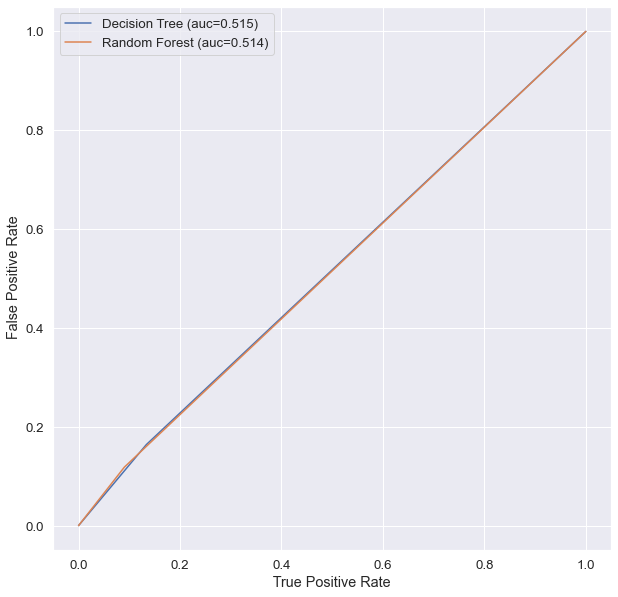

In [111]:
from sklearn.metrics import roc_curve,auc
RandomForest_tpr,RandomForest_fpr, threshold = roc_curve(y_test,y_pred_RF)
auc_RandomForest = auc(RandomForest_tpr,RandomForest_fpr)
# the fpr stands for the false positive rate and the tpr stands for the true positive rate 
Decision_Tree_tpr, Decision_Tree_fpr, thereshold = roc_curve(y_test,y_pred_DT)
auc_Decision_Tree = auc(Decision_Tree_tpr, Decision_Tree_fpr)
plt.plot(Decision_Tree_tpr,Decision_Tree_fpr, linestyle= "-", label = "Decision Tree (auc=%0.3f)"% auc_Decision_Tree)
plt.plot(RandomForest_tpr,RandomForest_fpr, linestyle= "-", label= "Random Forest (auc=%0.3f)" % auc_RandomForest)
plt.xlabel(" True Positive Rate ")
plt.ylabel(" False Positive Rate")
plt.legend()
## By comparing the AUC and ROC for XGBOOST and Random Forest, XGBoost algorithm performs better in predicting
## whether the client will default or not 

## In Conclusion, the best model to fit into the data is RandomForest Classifier with an accuracy of 84.69 %

In [112]:
import joblib

In [113]:
joblib.dump(model_RF, "model.pkl")

['model.pkl']